<a href="https://colab.research.google.com/github/AndreySukhanov/Deep_Learning/blob/main/cnn_project_Breast_Cance/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [34]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Data preprocessing

In [37]:
# Importing the dataset
from tensorflow.keras.datasets import mnist

In [38]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

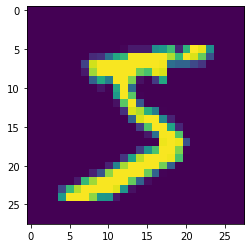

In [39]:
plt.imshow(x_train[0])

In [40]:
y_train[0]

5

In [41]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [42]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [43]:
x_train.min(), x_train.max()

(0, 255)

In [44]:
y_train.min(), y_train.max()

(0, 9)

In [45]:
# Normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [46]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [47]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [48]:
# Reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [49]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [50]:
input_shape = x_train[0].shape
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [51]:
# Define an object
model = tf.keras.models.Sequential()

In [52]:
# Adding secon CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding secon CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

# Adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# Adding flatten layers
model.add(tf.keras.layers.Flatten())

# Fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))




In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                      

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')

# Step 4: Training the Model

In [55]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 70s 148ms/step - loss: 0.1999 - sparse_categorical_accuracy: 0.9413 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9814
Epoch 2/10
469/469 [==============================] - 66s 140ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0401 - val_sparse_categorical_accuracy: 0.9858
Epoch 3/10
469/469 [==============================] - 69s 147ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 67s 143ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0315 - val_sparse_categorical_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 66s 142ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0371 - val_sparse_categorical_accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 66s 141ms/step - loss: 0.0235 -

In [74]:
# Model predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 4s 12ms/step


y_pred[15], y_test[15]

In [75]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 976    0    1    1    0    1    1    0    0    0]
 [   0 1132    0    2    0    0    1    0    0    0]
 [   1    1 1025    0    0    0    2    3    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  963    0    5    0    1   13]
 [   0    0    0    5    0  885    2    0    0    0]
 [   5    3    1    0    1    4  941    0    3    0]
 [   0    1    4    1    0    0    0 1020    1    1]
 [   2    0    4    2    0    2    1    0  961    2]
 [   0    1    1    0    5    6    0    1    0  995]]


In [76]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9905


# Step 5: Learning curve

In [78]:
def learning_curve(history, epoch):

    # Training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

    # Training vs validation loss

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()



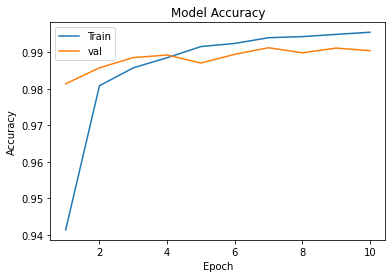

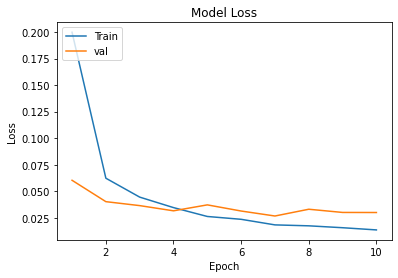

In [79]:
learning_curve(history, 10)